# widgets
* widget list: https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

## install ipywidgets on JupyterLab
```console
node -v
conda install nodejs
conda install -c conda-forge ipywidgets
jupyter labextension install @jupyter-widgets/jupyterlab-manager
```

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

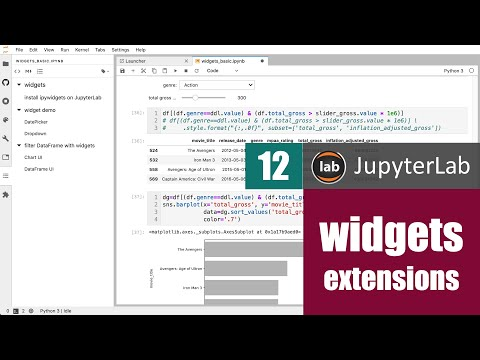

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('_YrB8JblQz8', width=720, height=405)

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [0]:
print(f'pandas version:  {pd.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas version:  0.25.3
seaborn version: 0.9.0


In [0]:
pd.Timestamp.now()

Timestamp('2020-01-13 05:41:40.185246')

In [0]:
from IPython.display import IFrame
IFrame('https://ipywidgets.readthedocs.io/en/latest/index.html', width=1024, height=800)

## widget demo

In [0]:
import ipywidgets as widgets

In [0]:
widgets.IntSlider()

IntSlider(value=0)

In [0]:
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [0]:
w.value

0

In [0]:
w = widgets.IntSlider(
    description='quantity: ',
    value=5,
    min=1,
    max=10,
    step=1,    
)
display(w)

IntSlider(value=5, description='quantity: ', max=10, min=1)

In [0]:
w.value

5

### DatePicker

In [0]:
dt = widgets.DatePicker(
    description='birth date:'
)
display(dt)

DatePicker(value=None, description='birth date:')

In [0]:
dt.value

### Dropdown

In [0]:
ddl=widgets.Dropdown(
    options=['mocha', 'latte', 'espresso'],
    value='latte',
    description='menu:',
    disabled=False,
)
display(ddl)

Dropdown(description='menu:', index=1, options=('macha', 'latte', 'espresso'), value='latte')

In [0]:
ddl.value

'latte'

In [0]:
ddl_country=widgets.Dropdown(
    options=[('Thailand', 'th'), ('Japan', 'jp'), ('Korean', 'kr')],
    value='jp',
    description='country:',
)
display(ddl_country)

Dropdown(description='country:', index=1, options=(('Thailand', 'th'), ('Japan', 'jp'), ('Korean', 'kr')), val…

In [0]:
ddl_country.value

'jp'

---

## filter DataFrame with widgets

In [0]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/disney_movie/clean/disney_gross.csv'
df=pd.read_csv(url, parse_dates=['release_date'])
df[:5]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


### Chart UI

In [0]:
s=df.genre.value_counts()
s

Comedy                 182
Adventure              129
Drama                  114
Action                  40
Thriller/Suspense       24
Romantic Comedy         23
Documentary             16
Musical                 16
Western                  7
Horror                   6
Black Comedy             3
Concert/Performance      2
Name: genre, dtype: int64

In [0]:
s.index

Index(['Comedy', 'Adventure', 'Drama', 'Action', 'Thriller/Suspense',
       'Romantic Comedy', 'Documentary', 'Musical', 'Western', 'Horror',
       'Black Comedy', 'Concert/Performance'],
      dtype='object')

In [0]:
s.values

array([182, 129, 114,  40,  24,  23,  16,  16,   7,   6,   3,   2],
      dtype=int64)

In [0]:
w = widgets.IntSlider(
    description='width: ',
    value=7,
    min=5,
    max=15,
    step=1,    
)
display(w)

h = widgets.IntSlider(
    description='height: ',
    value=5,
    min=5,
    max=10,
    step=1,    
)
display(h)

IntSlider(value=7, description='width: ', max=15, min=5)

IntSlider(value=5, description='height: ', max=10, min=5)

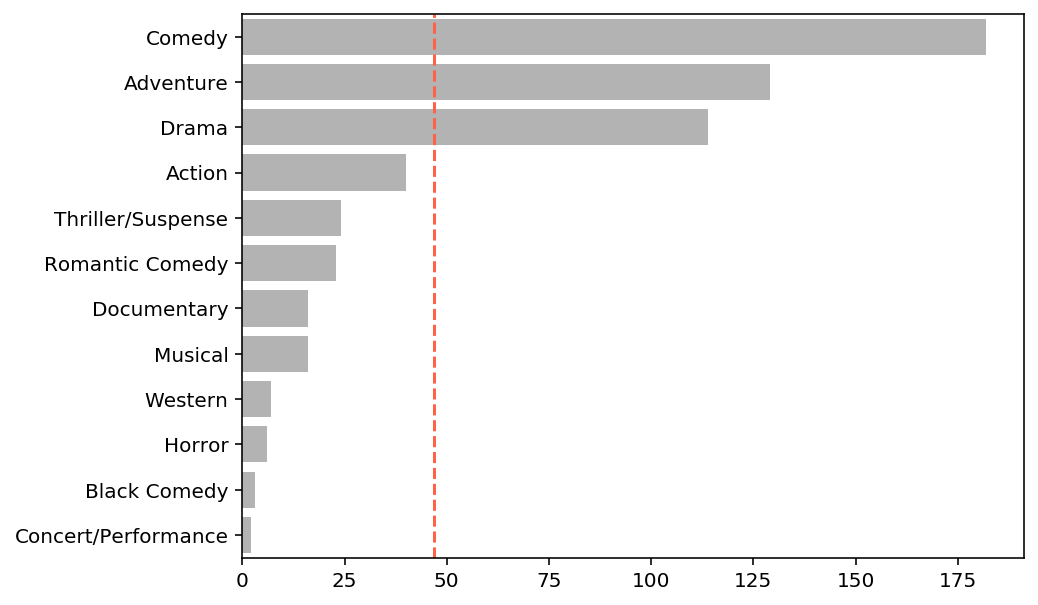

In [0]:
plt.figure(figsize=(w.value, h.value))
sns.barplot(x=s.values, y=s.index, color='.7')
plt.axvline(s.mean(), color='tomato', linestyle='--')

In [0]:
s.mean()

46.833333333333336

### DataFrame UI

In [0]:
df.genre.sort_values().unique()

array(['Action', 'Adventure', 'Black Comedy', 'Comedy',
       'Concert/Performance', 'Documentary', 'Drama', 'Horror', 'Musical',
       'Romantic Comedy', 'Thriller/Suspense', 'Western', nan],
      dtype=object)

In [0]:
df[df.genre.notna()]['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Black Comedy', 'Comedy',
       'Concert/Performance', 'Documentary', 'Drama', 'Horror', 'Musical',
       'Romantic Comedy', 'Thriller/Suspense', 'Western'], dtype=object)

In [0]:
ddl=widgets.Dropdown(
    options=df[df.genre.notna()]['genre'].sort_values().unique(),
    description='genre:',
    disabled=False,
)

slider_gross = widgets.IntSlider(
    description='total gross (mil): ',
    value=300,
    min=0,
    max=1000,
    step=10,
#     readout=True,
    readout_format=',.0f'
)

display(ddl)
display(slider_gross)

Dropdown(description='genre:', options=('Action', 'Adventure', 'Black Comedy', 'Comedy', 'Concert/Performance'…

IntSlider(value=300, description='total gross (mil): ', max=1000, readout_format=',.0f', step=10)

In [0]:
slider_gross.value

300

In [0]:
ddl.value

'Action'

In [0]:
# df[(df.genre==ddl.value) & (df.total_gross > slider_gross.value * 1e6)]
df[(df.genre==ddl.value) & (df.total_gross > slider_gross.value * 1e6)] \
    .style.format("{:,.0f}", subset=['total_gross', 'inflation_adjusted_gross'])

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
524,The Avengers,2012-05-04 00:00:00,Action,PG-13,"623,279,547","660,081,224"
532,Iron Man 3,2013-05-03 00:00:00,Action,PG-13,"408,992,272","424,084,233"
558,Avengers: Age of Ultron,2015-05-01 00:00:00,Action,PG-13,"459,005,868","459,005,868"
569,Captain America: Civil War,2016-05-06 00:00:00,Action,PG-13,"408,084,349","408,084,349"


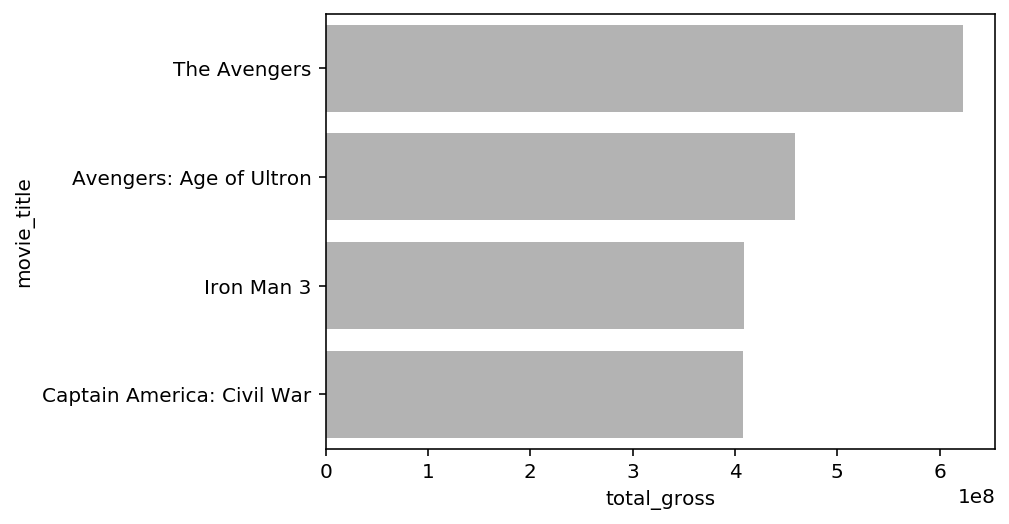

In [0]:
dg=df[(df.genre==ddl.value) & (df.total_gross > slider_gross.value * 1e6)]
sns.barplot(x='total_gross', y='movie_title', 
            data=dg.sort_values('total_gross', ascending=False),
            color='.7')

In [0]:
df.query(f'genre == "{ddl.value}" & total_gross > {slider_gross.value * 1e6}') \
    .style.format("{:,.0f}", subset=['total_gross', 'inflation_adjusted_gross'])

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
524,The Avengers,2012-05-04 00:00:00,Action,PG-13,"623,279,547","660,081,224"
532,Iron Man 3,2013-05-03 00:00:00,Action,PG-13,"408,992,272","424,084,233"
558,Avengers: Age of Ultron,2015-05-01 00:00:00,Action,PG-13,"459,005,868","459,005,868"
569,Captain America: Civil War,2016-05-06 00:00:00,Action,PG-13,"408,084,349","408,084,349"
